# Customer Segmentation

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The task is to segment customers based on their transaction histories. Specify the algorithm you decided to use for this task and the reason behind your choice.

**Things Expected**
- Reasoning behind choice of number of clusters for the segmentation
- A cluster plot with different colors for each cluster
- Description of each cluster i.e. features common across various clusters
- A csv output containing feature averages for each cluster. Do add the number of users in each cluster

**NB:** Kindly add comments to the cells describing what is done at each step

In [1]:
# importing basic packages
# Import the necessary pythonpackages that can help in building the model or plotting values
import pandas as pd

In [2]:
# reading input data
train_data = pd.read_csv("../../Customer Segmentation/data/data.csv", encoding = "ISO-8859-1")

In [3]:
train_data.shape

(541909, 8)

In [4]:
train_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Data Exploration and Cleaning

In [5]:
# checking the data types and the presence of null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


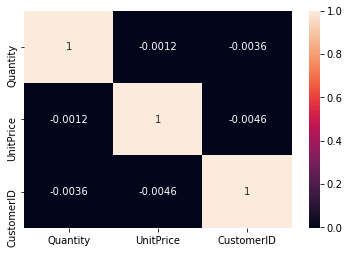

In [6]:
#checking for collinearity in features
import seaborn as sns
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot = True)



From the above correlation map, there is no high collinearity between the numerical features

In [25]:
#checking a random sample of the train data
train_data.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
399499,571281,85014B,RED RETROSPOT UMBRELLA,24,10/16/2011 13:23,4.95,14088.0,United Kingdom
521059,580311,23319,BOX OF 6 MINI 50'S CRACKERS,12,12/2/2011 14:48,2.49,18245.0,United Kingdom
75912,542614,22469,HEART OF WICKER SMALL,12,1/30/2011 14:37,1.65,15708.0,United Kingdom
318676,564837,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,1,8/30/2011 12:40,4.96,NaN,United Kingdom
171187,551395,84247G,"DECOUPAGE,GREETING CARD,",12,4/28/2011 12:47,0.42,14271.0,United Kingdom
305065,563622,23316,RED REFECTORY CLOCK,2,8/18/2011 10:21,9.95,15189.0,United Kingdom
158737,550311,22467,GUMBALL COAT RACK,4,4/17/2011 11:04,2.55,16728.0,United Kingdom
351183,567662,23551,PACK OF 12 PAISLEY PARK TISSUES,12,9/21/2011 15:12,0.39,17758.0,United Kingdom
522329,580396,23082,SET 6 PAPER TABLE LANTERN HEARTS,1,12/4/2011 11:00,3.75,13838.0,United Kingdom
278323,561209,35916A,YELLOW FELT HANGING HEART W FLOWER,8,7/25/2011 16:57,0.63,NaN,United Kingdom


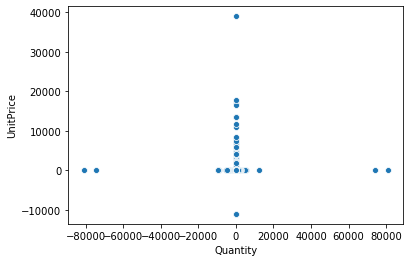

In [8]:
#checking for the presence of outliers
sns.scatterplot(x=train_data['Quantity'], y=train_data['UnitPrice'])

From the above scatter plot, there are some outliers in the dataset. I decided to remove these outliers so that they do not distort the clustering, since they do not represent regular customers or trading activities.

In [51]:
# removing any data point that is three standard deviations away from the mean
import numpy as np
from scipy import stats
from pandas import DataFrame as df
z_scores = stats.zscore(train_data.loc[:,['Quantity', 'UnitPrice']])


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_train_data = train_data[filtered_entries]

new_train_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


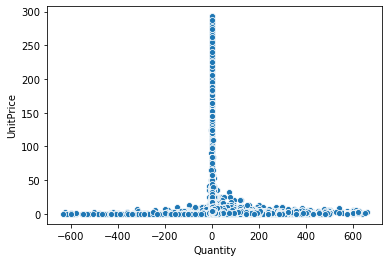

In [10]:
sns.scatterplot(x=new_train_data['Quantity'], y=new_train_data['UnitPrice'])

The scatter plot above reflects the data points after the outliers have been removed

## Fitting only numerical features to KMeans algorithm

The first step is to determine the number of clusters to use when fitting the data to the algorithm. To determine the number of clusters, I will use the elbow method which helps determine the value of k(number of clusters) that minimizes the within cluster sum of squares(WCSS or inertia) without overfitting the data.

To do this, I set the value of k within the range 1 to 11 and calculate the WCSS values at each level of k. I then plot these values of WCSS across the various levels of k to select the appropriate k values

In [11]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(new_train_data.loc[:,['Quantity', 'UnitPrice']])
    wcss.append(kmeans.inertia_)
    

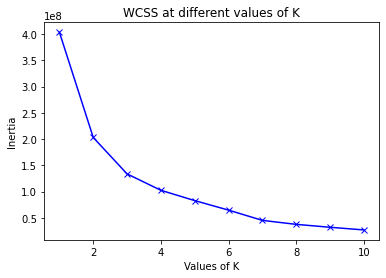

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('WCSS at different values of K') 
plt.show() 

From the plot above, after k=3, WCSS descreases slowly, hence any additional cluster does not explain much of the variation in the dataset and will rather cause overfitting. Hence k=3 will be the appropriate number of clusters to use

In [22]:
# using k=3 to segment the data points

kmeans = KMeans(n_clusters=3, random_state=0).fit(new_train_data.loc[:,['Quantity', 'UnitPrice']])
Labels = kmeans.labels_
Centroids = kmeans.cluster_centers_
print('Labels: ', Labels)
print('Centroids: ', Centroids)


Labels:  [0 0 0 ... 0 0 0]
Centroids:  [[  6.43019253   3.56062589]
 [356.05607477   1.34823149]
 [105.92505699   1.50049962]]


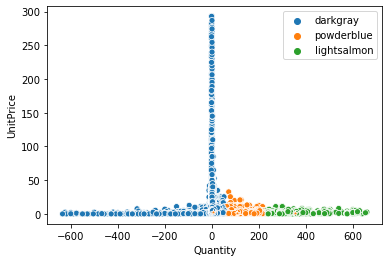

In [26]:
# plotting the data points with the predicted labels

color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])
sns.scatterplot(x=new_train_data['Quantity'], y=new_train_data['UnitPrice'], hue=color_theme[Labels])
sns.scatterplot(x=Centroids[:,0], y=Centroids[:,1], marker='*')
#hue = np.unique(Labels)

In [62]:
num_data = new_train_data.loc[:,['Quantity', 'UnitPrice']]
num_data.dropna(axis=0, inplace=True)
num_data.reset_index(inplace=True, drop=True)
num_data

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541184,12,0.85
541185,6,2.10
541186,4,4.15
541187,4,4.15


In [63]:
Labels_df = pd.DataFrame(Labels, columns=['Labels'])
labeled_data = pd.concat([num_data, Labels_df], axis=1)
labeled_data
print(labeled_data.info())
print(labeled_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541189 entries, 0 to 541188
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Quantity   541189 non-null  int64  
 1   UnitPrice  541189 non-null  float64
 2   Labels     541189 non-null  int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 10.3 MB
None
        Quantity  UnitPrice  Labels
0              6       2.55       0
1              6       3.39       0
2              8       2.75       0
3              6       3.39       0
4              6       3.39       0
...          ...        ...     ...
541184        12       0.85       0
541185         6       2.10       0
541186         4       4.15       0
541187         4       4.15       0
541188         3       4.95       0

[541189 rows x 3 columns]


In [67]:
labeled_data.groupby('Labels').count()


,Quantity,UnitPrice
Labels,,
0,529270,529270
1,1391,1391
2,10528,10528


In [68]:
labeled_data.groupby('Labels').mean()

,Quantity,UnitPrice
Labels,,
0,6.430193,3.560626
1,356.056075,1.348231
2,105.925057,1.500500


### Description of Clusters
- Almost all the data points(97%) belong to cluster 0. The average unit price of products bought by customers is about 3 times higher than in any other cluster. However average quantity is very low.
- Cluster 1 has the least number of data points. Average price is 1.34 which is the lowest. However the average quantity of 356 is the highest
- Cluster 2 has an average price os 1.5 and average quantity of 105.

## Using Categorical and Numerical Features

In [13]:
cat_train_data = train_data.drop(['CustomerID', 'InvoiceNo', 'StockCode', 'Description'], axis=1)
cat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     541909 non-null  int64  
 1   InvoiceDate  541909 non-null  object 
 2   UnitPrice    541909 non-null  float64
 3   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 16.5+ MB


In [14]:
cat_train_data = cat_train_data.dropna()
cat_train_data.reset_index(inplace = True, drop = True)
cat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     541909 non-null  int64  
 1   InvoiceDate  541909 non-null  object 
 2   UnitPrice    541909 non-null  float64
 3   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 16.5+ MB


In [15]:
cat_train_data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [16]:
gb = train_data.groupby(['Country']).count().sort_values(by='InvoiceNo', ascending=False)
lower_values = gb.iloc[15:,]
index_values = lower_values.index.values
index_values

array(['Sweden', 'Unspecified', 'Austria', 'Denmark', 'Japan', 'Poland',
       'Israel', 'USA', 'Hong Kong', 'Singapore', 'Iceland', 'Canada',
       'Greece', 'Malta', 'United Arab Emirates', 'European Community',
       'RSA', 'Lebanon', 'Lithuania', 'Brazil', 'Czech Republic',
       'Bahrain', 'Saudi Arabia'], dtype=object)

In [17]:
cat_train_data.replace(index_values,'Other Countries', inplace=True)
cat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     541909 non-null  int64  
 1   InvoiceDate  541909 non-null  object 
 2   UnitPrice    541909 non-null  float64
 3   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 16.5+ MB


In [18]:
cat_train_data['Country'].value_counts()

United Kingdom     495478
Germany              9495
France               8557
EIRE                 8196
Other Countries      4466
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          2002
Portugal             1519
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Name: Country, dtype: int64

In [19]:
cat_dummies = pd.get_dummies(cat_train_data['Country'], prefix='Country')
cat_train_data = pd.concat([cat_train_data, cat_dummies], axis=1)
cat_train_data.drop('Country', inplace=True, axis=1)
cat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Quantity                 541909 non-null  int64  
 1   InvoiceDate              541909 non-null  object 
 2   UnitPrice                541909 non-null  float64
 3   Country_Australia        541909 non-null  uint8  
 4   Country_Belgium          541909 non-null  uint8  
 5   Country_Channel Islands  541909 non-null  uint8  
 6   Country_Cyprus           541909 non-null  uint8  
 7   Country_EIRE             541909 non-null  uint8  
 8   Country_Finland          541909 non-null  uint8  
 9   Country_France           541909 non-null  uint8  
 10  Country_Germany          541909 non-null  uint8  
 11  Country_Italy            541909 non-null  uint8  
 12  Country_Netherlands      541909 non-null  uint8  
 13  Country_Norway           541909 non-null  uint8  
 14  Coun

In [20]:
import datetime
date_time_list = []
for date_str in cat_train_data['InvoiceDate']:
    date_time_obj = datetime.datetime.strptime(date_str, '%m/%d/%Y %H:%M')
    time_float = date_time_obj.timestamp()
    date_time_list.append(time_float)

In [21]:
cat_train_data['InvoiceDate'] = date_time_list
cat_train_data

,Quantity,InvoiceDate,UnitPrice,Country_Australia,Country_Belgium,Country_Channel Islands,Country_Cyprus,Country_EIRE,Country_Finland,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Norway,Country_Other Countries,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom
0,6,1.291192e+09,2.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,1.291192e+09,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,8,1.291192e+09,2.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6,1.291192e+09,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6,1.291192e+09,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,12,1.323435e+09,0.85,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541905,6,1.323435e+09,2.10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541906,4,1.323435e+09,4.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541907,4,1.323435e+09,4.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [22]:
import numpy as np
from scipy import stats
from pandas import DataFrame as df
z_scores = stats.zscore(cat_train_data.loc[:,['Quantity', 'UnitPrice']])


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
cat_train_data = cat_train_data[filtered_entries]

cat_train_data

,Quantity,InvoiceDate,UnitPrice,Country_Australia,Country_Belgium,Country_Channel Islands,Country_Cyprus,Country_EIRE,Country_Finland,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Norway,Country_Other Countries,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom
0,6,1.291192e+09,2.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,1.291192e+09,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,8,1.291192e+09,2.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6,1.291192e+09,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6,1.291192e+09,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,12,1.323435e+09,0.85,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541905,6,1.323435e+09,2.10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541906,4,1.323435e+09,4.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541907,4,1.323435e+09,4.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
rom sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()


In [23]:
from sklearn.preprocessing import StandardScaler
cat_data_scaled = StandardScaler().fit_transform(cat_train_data.loc[:,['Quantity', 'UnitPrice']])
cat_data_scaled


array([[-0.12413262, -0.13108381],
       [-0.12413262, -0.01696355],
       [-0.04807898, -0.10391232],
       ...,
       [-0.20018626,  0.08628811],
       [-0.20018626,  0.08628811],
       [-0.23821308,  0.19497407]])

In [24]:
cat_train_data['Quantity'] = cat_data_scaled[:,0]
cat_train_data['UnitPrice'] = cat_data_scaled[:,1]
cat_train_data


C:\Users\pyfba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\pyfba\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Quantity,InvoiceDate,UnitPrice,Country_Australia,Country_Belgium,Country_Channel Islands,Country_Cyprus,Country_EIRE,Country_Finland,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Norway,Country_Other Countries,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom
0,-0.124133,1.291192e+09,-0.131084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.124133,1.291192e+09,-0.016964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.048079,1.291192e+09,-0.103912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.124133,1.291192e+09,-0.016964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.124133,1.291192e+09,-0.016964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,0.104028,1.323435e+09,-0.362041,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541905,-0.124133,1.323435e+09,-0.192220,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541906,-0.200186,1.323435e+09,0.086288,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541907,-0.200186,1.323435e+09,0.086288,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=5, random_state=0).fit(cat_train_data)
    wcss.append(kmeans.inertia_)
    

In [25]:


cat_kmeans = KMeans(n_clusters=5, random_state=0).fit(cat_train_data)
cat_labels = cat_kmeans.labels_
cat_centroids = cat_kmeans.cluster_centers_
print('Labels: ', cat_labels)
print('Centroids: ', cat_centroids)


Labels:  [3 3 3 ... 4 4 4]
Centroids:  [[ 4.90888106e-02  1.31569991e+09 -2.68488492e-02  2.92543315e-03
   3.90359656e-03  2.60843575e-03  2.89826195e-04  2.18909348e-02
   1.21364719e-03  2.03602902e-02  1.94545833e-02  1.10496237e-03
   5.10818668e-03  2.73523471e-03  9.47369374e-03  3.56848502e-03
   4.72778980e-03  6.41240456e-03  8.94222496e-01]
 [ 6.72852852e-03  1.30109971e+09  3.30824126e-02  2.29560304e-03
   4.55809642e-03  2.21834717e-03  1.24713050e-03  1.45461769e-02
   2.99090588e-03  1.21953911e-02  1.45351404e-02  1.32438637e-03
   4.14974395e-03  5.07681441e-04  6.87577256e-03  2.73706516e-03
   4.11663429e-03  3.44340456e-03  9.22258520e-01]
 [ 1.89356193e-02  1.30839843e+09  1.79163548e-02  4.81647883e-03
   4.54043558e-03  1.12321048e-03  4.47380445e-04  1.70099756e-02
   9.13798355e-04  1.64483704e-02  2.05128693e-02  3.99786780e-04
   5.21626561e-03  2.03700883e-03  1.21459031e-02  2.04652757e-03
   3.92171794e-03  3.05551325e-03  9.05364758e-01]
 [-4.78976665e-0

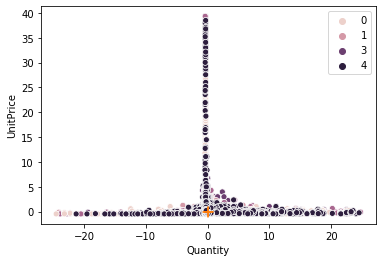

In [26]:
sns.scatterplot(x=cat_train_data['Quantity'], y=cat_train_data['UnitPrice'], hue=cat_labels)
sns.scatterplot(x=cat_centroids[:,0], y=cat_centroids[:,2], marker='+', s=100)
#hue = np.unique(Labels)